## This is Machine learning Prediction of Hotel Booking Cancellation in portugal.

### Importing all the impotant Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

### Reading the Data

In [2]:
df = pd.read_csv('hotel_bookings.csv')

### Fetching the  top 10 data with all columns to check the data

In [3]:
pd.pandas.set_option('display.max_columns', None)
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


### Getting information about all the data and columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Getting the number of rows and columns

In [5]:
df.shape

(119390, 32)

### Describing the dataset

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Checking for null Values

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Here we can see there are null values present in 4 columns, Now we will check how many percent null values are present out of total

In [8]:
df.isnull().sum()/df.shape[0]*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

### Now we will show the null values using visualization

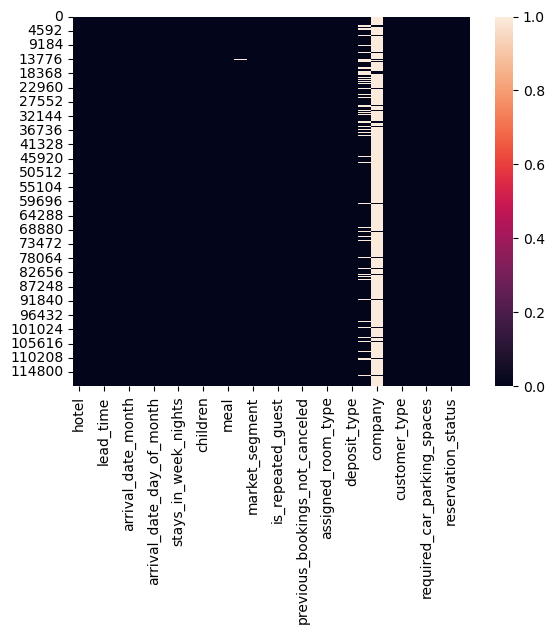

In [9]:
sb.heatmap(data=df.isnull())
plt.show()

### We will fill the null values for Children, Country and agent columns as the null values are less than 50 % but we are going to drop the company column as the null values are more than 50% and almost 95% of data is missing so there is no point in considering that column for prediction


In [10]:
df.drop(['company'],inplace=True,axis=1)

In [11]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Before Filling the null Values we will check for the duplicate values in the dataset

In [12]:
df.duplicated().sum()

32001

### We can see that out of 1.2 lacs of data 32k data rows are duplicate, We will droping the duplicate values

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Now we can see the rows are reduced to around 88k, It will be easier for prediction.
### Now we will be filling the null values in different columns

In [15]:
df['children'].value_counts()

children
0.0     79021
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64

### Filling 0 in children null values as its mode is 0

In [16]:
df['children'] = df['children'].fillna(0)
df['children'].isnull().sum()

0

In [17]:
df['country'].isnull().sum()

452

In [18]:
df['country'].value_counts()

country
PRT    27449
GBR    10432
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

### Filling the missing values in country by mode

In [19]:
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])
df['country'].isnull().sum()

0

In [20]:
df['agent'].isnull().sum()

12189

In [21]:
df['agent'].value_counts()

agent
9.0      28757
240.0    13027
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: count, Length: 333, dtype: int64

In [22]:
df['agent'].nunique()

333

### As there are 333 unique values in agent filling the data will be very hard, Hence dropping it

In [23]:
df.drop(['agent'],inplace=True,axis=1)

### Now the data is fully cleaned and ready to perform some Visualization

In [24]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [25]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [26]:
df['hotel'].value_counts()

hotel
City Hotel      53426
Resort Hotel    33963
Name: count, dtype: int64

### As we can see in the count plot city hotel are more than the resort hotels, Hence Cancellation rate for city hotels is high

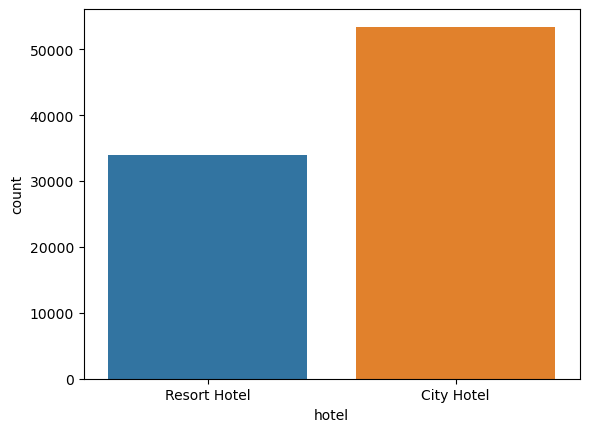

In [27]:
sb.countplot(x='hotel',data=df)
plt.show()

In [28]:
df['is_canceled'].value_counts()

is_canceled
0    63364
1    24025
Name: count, dtype: int64

### The figure shows the amounts of hotel cancellation count

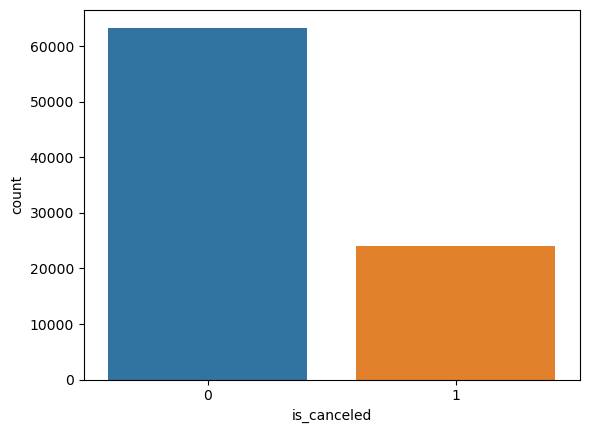

In [29]:
sb.countplot(x='is_canceled',data=df)
plt.show()

In [30]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    42388
2017    31690
2015    13311
Name: count, dtype: int64

### Year 2016 had the most number of tourist arrival and hotel booking

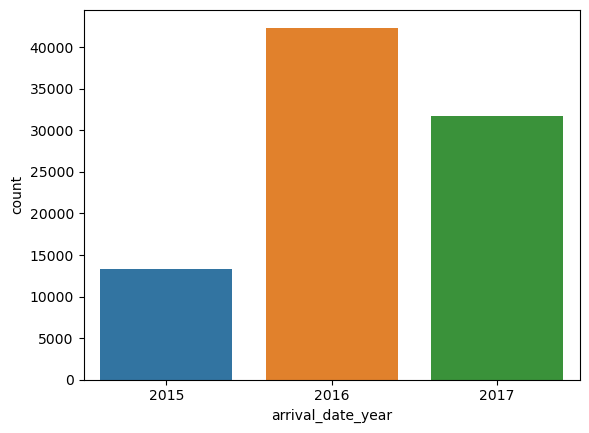

In [31]:
sb.countplot(x='arrival_date_year',data=df)
plt.show()

### August month had most number of tourists

In [32]:
df['arrival_date_month'].value_counts()

arrival_date_month
August       11257
July         10056
May           8354
April         7908
June          7765
March         7513
October       6934
September     6689
February      6097
December      5130
November      4993
January       4693
Name: count, dtype: int64

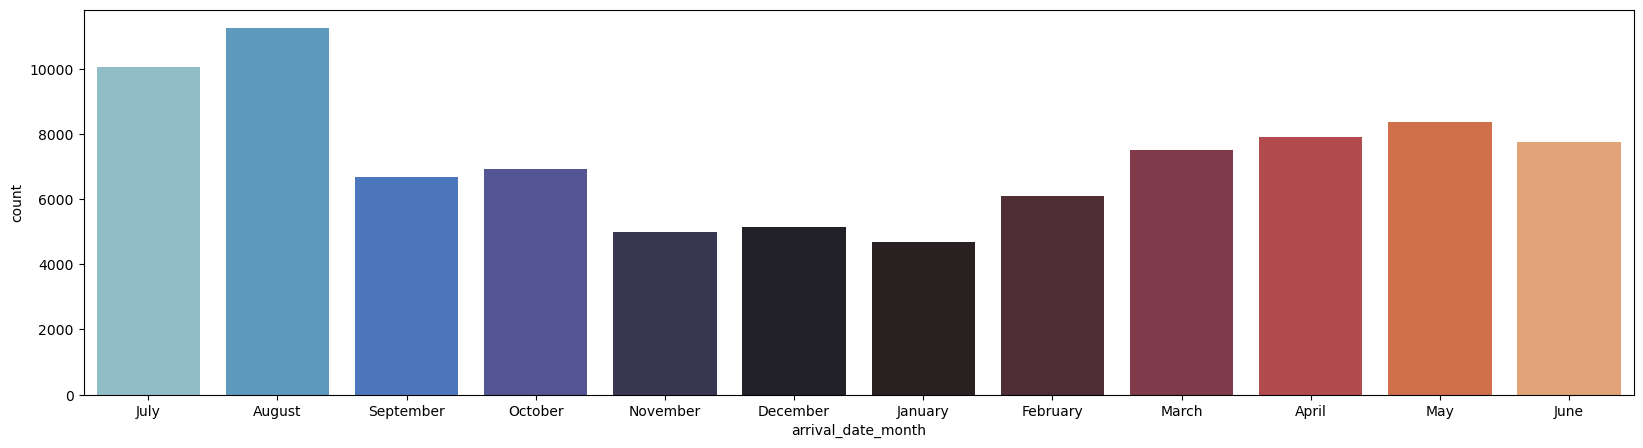

In [33]:
plt.figure(figsize = (20, 5))
sb.countplot(x='arrival_date_month',data=df,palette = 'icefire')
plt.show()

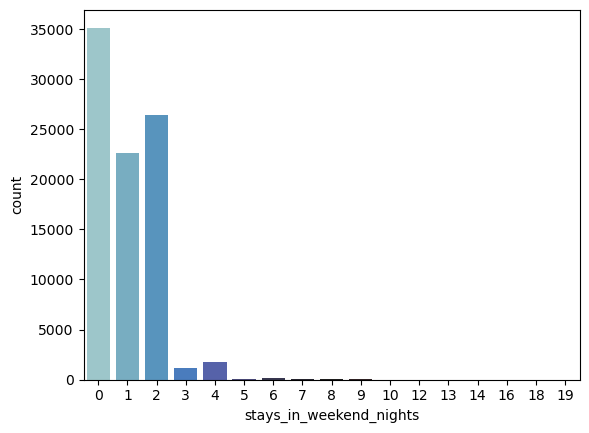

In [34]:
sb.countplot(x='stays_in_weekend_nights',data=df,palette = 'icefire')
plt.show()

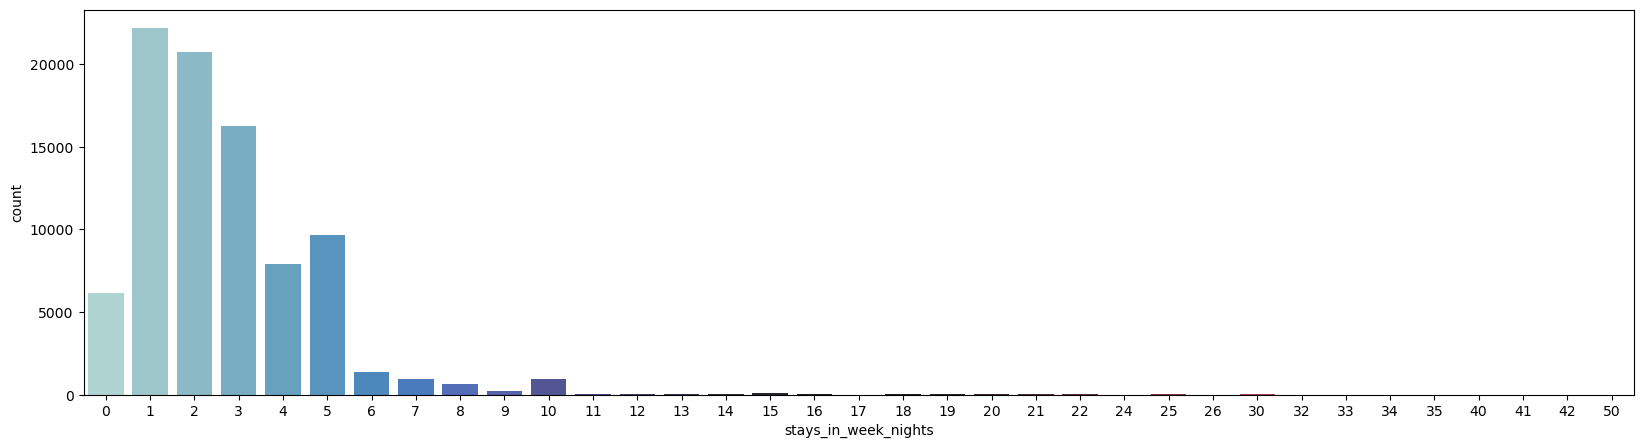

In [35]:
plt.figure(figsize = (20, 5))
sb.countplot(x='stays_in_week_nights',data=df,palette = 'icefire')
plt.show()

### As we can see in above figures Tourist stayed for more days in weekdays than weekends 

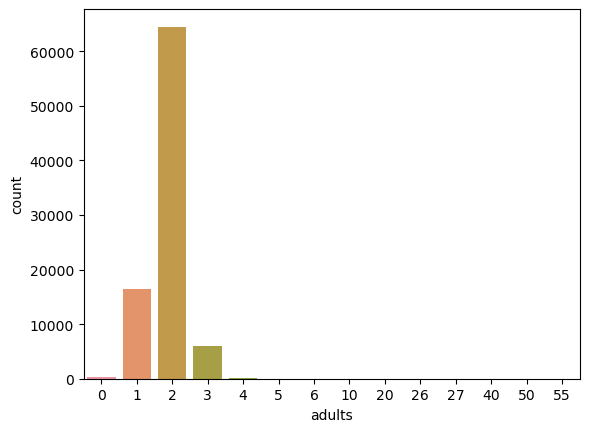

In [36]:
sb.countplot(x='adults',data=df)
plt.show()

In [37]:
df['adults'].value_counts()

adults
2     64495
1     16498
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

### We can observe the tourists were mostly couples, solo and small family

In [38]:
df['market_segment'].value_counts()

market_segment
Online TA        51615
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4208
Complementary      702
Aviation           227
Undefined            2
Name: count, dtype: int64

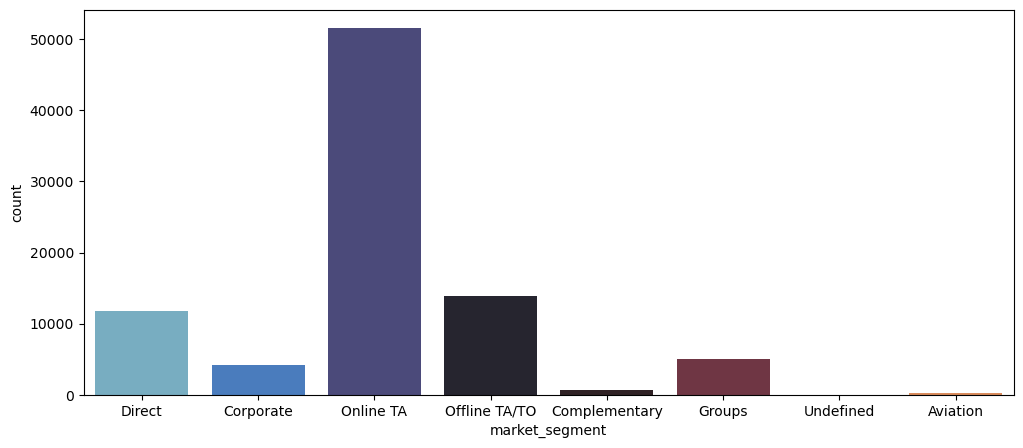

In [39]:
plt.figure(figsize = (12, 5))
sb.countplot(x='market_segment',data=df,palette = 'icefire')
plt.show()

### In the above figure we can see the most number of tourist have came through Online tourist Agents

In [40]:
df['is_repeated_guest'].value_counts()

is_repeated_guest
0    83974
1     3415
Name: count, dtype: int64

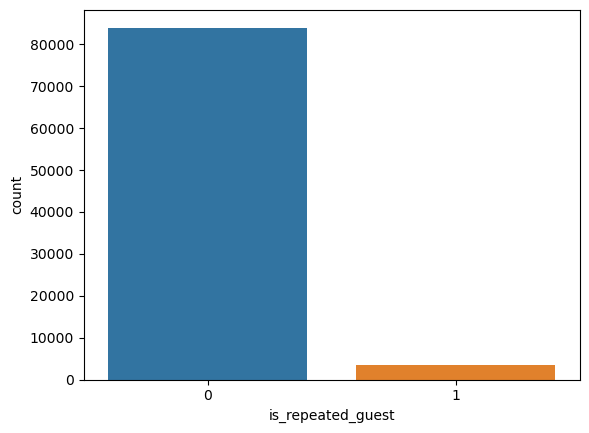

In [41]:

sb.countplot(x='is_repeated_guest',data=df)
plt.show()

### As we can see the guest are getting repeated

In [42]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    86244
Non Refund     1038
Refundable      107
Name: count, dtype: int64

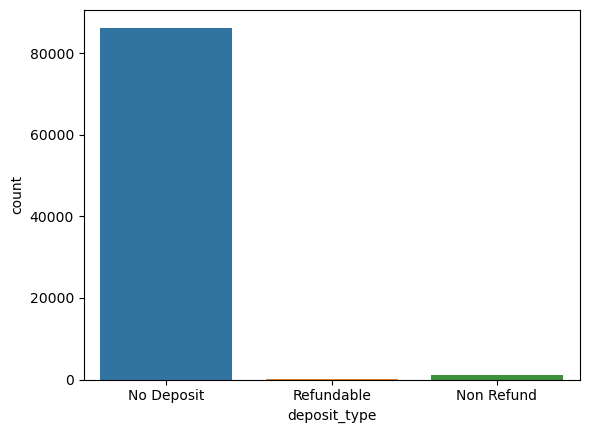

In [43]:
sb.countplot(x='deposit_type',data=df)
plt.show()

### As we can see the No deposit was taken for hotel booking hence the cancellation rate is high

In [44]:
df['customer_type'].value_counts()

customer_type
Transient          71982
Transient-Party    11724
Contract            3139
Group                544
Name: count, dtype: int64

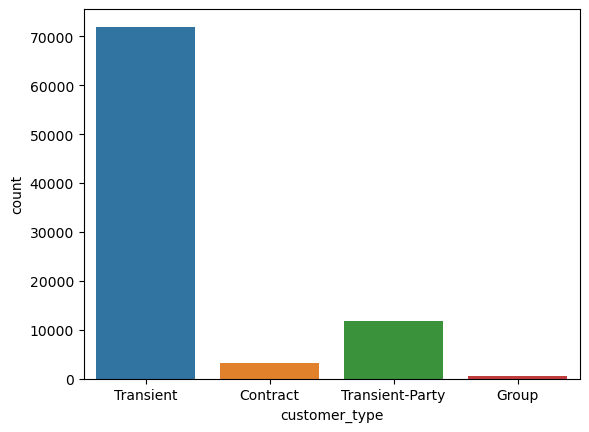

In [45]:
sb.countplot(x='customer_type',data=df)
plt.show()

### As we can see the almost 70% customer was transient, Customers tends to change his mind and there is no deposit while booking the hotel, It increases the cancellation rate

In [46]:
df['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    80076
1     7280
2       28
3        3
8        2
Name: count, dtype: int64

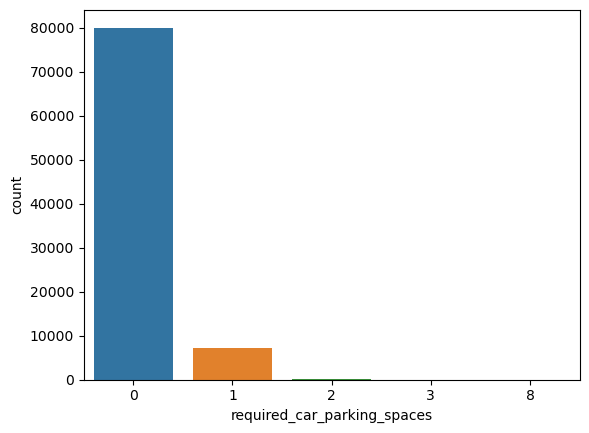

In [47]:

sb.countplot(x='required_car_parking_spaces',data=df)
plt.show()

### When there is no parking space of hotel the customer tends to cancel the booking as keeping their vehicle safe is customers priority

### Now we will move towards feature selection.
### The dataset is of combination of object and numbers hence we need to encode the data

In [48]:
df_num=df.select_dtypes(["int64","float64"])
df_num

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [49]:
df_obj=df.select_dtypes("object")
df_obj

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [50]:
le=LabelEncoder()

In [51]:
for col in df_obj:
    df_obj[col]=le.fit_transform(df_obj[col])

In [52]:
df_obj.head(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,1,5,0,135,3,1,2,2,0,2,1,121
1,1,5,0,135,3,1,2,2,0,2,1,121
2,1,5,0,59,3,1,0,2,0,2,1,122
3,1,5,0,59,2,0,0,0,0,2,1,122
4,1,5,0,59,6,3,0,0,0,2,1,123


In [53]:
new_df=pd.concat([df_num,df_obj],axis=1)

In [54]:
new_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0,1,5,0,135,3,1,2,2,0,2,1,121
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0,1,5,0,135,3,1,2,2,0,2,1,121
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,1,5,0,59,3,1,0,2,0,2,1,122
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,1,5,0,59,2,0,0,0,0,2,1,122
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1,1,5,0,59,6,3,0,0,0,2,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0,0,1,0,15,5,3,0,0,0,2,1,919
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2,0,1,0,56,6,3,4,4,0,2,1,920
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4,0,1,0,43,6,3,3,3,0,2,1,920
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0,0,1,0,59,6,3,0,0,0,2,1,920


### Now the data is fully converted into numbers but the data is not in proper scale hence we need to do scaling

In [55]:
X=new_df.drop("is_canceled",axis=1)
Y=new_df["is_canceled"]

In [56]:
X

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0,1,5,0,135,3,1,2,2,0,2,1,121
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0,1,5,0,135,3,1,2,2,0,2,1,121
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,1,5,0,59,3,1,0,2,0,2,1,122
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,1,5,0,59,2,0,0,0,0,2,1,122
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1,1,5,0,59,6,3,0,0,0,2,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0,0,1,0,15,5,3,0,0,0,2,1,919
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2,0,1,0,56,6,3,4,4,0,2,1,920
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4,0,1,0,43,6,3,3,3,0,2,1,920
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0,0,1,0,59,6,3,0,0,0,2,1,920


In [57]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 87389, dtype: int64

### Applying Train test split

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

### Appyling Scailing

In [59]:
ss=StandardScaler()

In [60]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [61]:
X_train.shape

(61172, 29)

In [62]:
X_test.shape

(26217, 29)

### Applying Logistic regression Algorithm

In [63]:
lr=LogisticRegression()

In [64]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [65]:
y_pred = lr.predict(X_test)

In [66]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
accuracy_score(Y_test,y_pred)*100

98.86333295190144

In [68]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19091
           1       1.00      0.96      0.98      7126

    accuracy                           0.99     26217
   macro avg       0.99      0.98      0.99     26217
weighted avg       0.99      0.99      0.99     26217



In [69]:
print(confusion_matrix(Y_test,y_pred))

[[19091     0]
 [  298  6828]]


#### After applying Logistic Regression.
#### Accuracy score marked at - 98% 
#### Now we will apply Decision tree Classifier to see if the accuracy score is increasing and False negative Values is decreasing or not

In [70]:
dtc = DecisionTreeClassifier()

In [71]:
dtc.fit(X_train,Y_train)


DecisionTreeClassifier()

In [72]:
y_pred2 = dtc.predict(X_test)

In [77]:
accuracy_score(Y_test,y_pred2)*100

100.0

In [74]:
print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19091
           1       1.00      1.00      1.00      7126

    accuracy                           1.00     26217
   macro avg       1.00      1.00      1.00     26217
weighted avg       1.00      1.00      1.00     26217



In [75]:
print(confusion_matrix(Y_test,y_pred2))

[[19091     0]
 [    0  7126]]


In [76]:
print('Accuracy Score',accuracy_score(Y_test,y_pred2))
print('Precision Score',precision_score(Y_test,y_pred2))
print('Recall Score',recall_score(Y_test,y_pred2))
print('F1 Score',f1_score(Y_test,y_pred2))

Accuracy Score 1.0
Precision Score 1.0
Recall Score 1.0
F1 Score 1.0


### After Applying decision tree we can obeserve all the parameters are proper and False negative has been eliminated.
### The model is predicting properly the hotel booking cancellation prediction and is ready to deploy